In [1]:
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization , Activation, MaxPool2D, UpSampling2D, Concatenate, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import os

In [2]:
Test_number= 100

In [3]:
Height = 128
Width= 128
input_shape = (128,128,3)
NumOfCategories = 3

In [4]:
model = tf.keras.models.load_model("./models/model-Unet.h5")

In [5]:
image = np.load("./numpy_array/allTestImagesNP.npy")
masked_img = np.load("./numpy_array/maskTestImagesNP.npy") 

In [6]:
masked_img = masked_img -1 
masked_img  = tf.keras.utils.to_categorical(masked_img , num_classes=NumOfCategories) # One hot encoder

masked_img  = masked_img.astype(int) # convert from float to integer

In [7]:
Test_image = (image[Test_number] * 255).astype("uint8")
Test_mask  = (masked_img[Test_number]*255).astype("uint8")

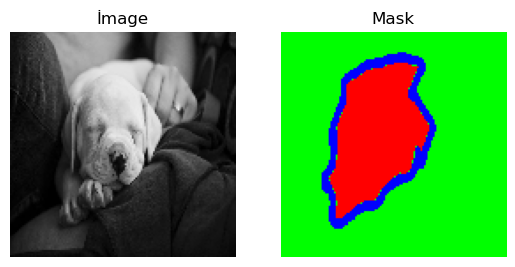

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(Test_image)
ax1.set_title('İmage')

ax2.imshow(Test_mask)
ax2.set_title('Mask')

ax1.axis('off')
ax2.axis('off')

plt.show()

In [9]:
# show one image
img = image[Test_number] # image no. 4
print(img.shape)
imgForModel = np.expand_dims(img, axis=0)
print(imgForModel.shape)

(128, 128, 3)
(1, 128, 128, 3)


In [10]:
p = model.predict(imgForModel)
p.shape

1/1 [==============================] - 1s 694ms/step


(1, 128, 128, 3)

In [11]:
resultMask = p[0]
resultMask.shape

(128, 128, 3)

In [12]:
resultMask = np.argmax(resultMask, axis= -1)
print(resultMask.shape)
resultMask = np.expand_dims(resultMask , axis=-1)
print(resultMask.shape)

Test_mask = np.argmax(masked_img[Test_number], axis= -1)
print(Test_mask.shape)
Test_mask = np.expand_dims(Test_mask , axis=-1)
print(Test_mask.shape)

(128, 128)
(128, 128, 1)
(128, 128)
(128, 128, 1)


In [13]:
resultMask = (resultMask * (255 / NumOfCategories)).astype(np.uint8)

Test_mask = (Test_mask * (255 / NumOfCategories)).astype(np.uint8)

In [14]:
p_mask = cv2.resize(resultMask, (Width, Height), interpolation=cv2.INTER_NEAREST)
p_mask

array([[85, 85, 85, ..., 85, 85, 85],
       [85, 85, 85, ..., 85, 85, 85],
       [85, 85, 85, ..., 85, 85, 85],
       ...,
       [85, 85, 85, ..., 85, 85, 85],
       [85, 85, 85, ..., 85, 85, 85],
       [85, 85, 85, ..., 85, 85, 85]], dtype=uint8)

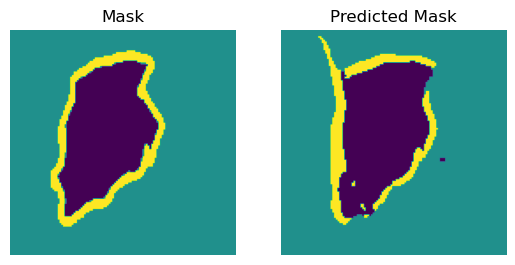

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(Test_mask)
ax1.set_title('Mask')

ax2.imshow(p_mask)
ax2.set_title('Predicted Mask')

ax1.axis('off')
ax2.axis('off')

plt.show()

In [16]:
Test_mask.shape

(128, 128, 1)

In [17]:
predicted_mask = np.concatenate([resultMask, resultMask, resultMask], axis=2)
predicted_mask.shape

(128, 128, 3)

In [18]:
gray = predicted_mask.copy()
gray = cv2.cvtColor(gray , cv2.COLOR_BGR2GRAY)

unique_vals = np.unique(gray)

gray[gray == 170] = 255
gray[gray == 0] = 255

gray[gray == 85] = 0

masked_img = cv2.bitwise_and(img, img, mask=gray)
masked_img = cv2.resize(masked_img, (256,256))

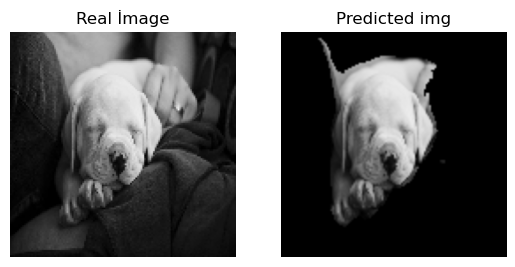

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(Test_image)
ax1.set_title('Real İmage')

ax2.imshow(masked_img)
ax2.set_title('Predicted img')

ax1.axis('off')
ax2.axis('off')

plt.show()